In [2]:
from pcntoolkit.util.hbr_utils import *
import numpy as np
import pickle
from matplotlib import pyplot as plt
from pcntoolkit.util.utils import scaler
from matplotlib import patches
cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
features = ['Right-Cerebellum-White-Matter',
            'EstimatedTotalIntraCranialVol',
            'Right-Lateral-Ventricle',
            'WM-hypointensities',
            'rh_S_interm_prim-Jensen_thickness', 
            'Brain-Stem']


selected_feature = features[3]

In [4]:
# Get data
X_train = pickle.load(open("/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_0/X_train.pkl",'rb')).to_numpy()
Y_train = pickle.load(open("/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_0/Y_train.pkl",'rb'))
Z_train = pickle.load(open("/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_0/Z_train.pkl",'rb')).to_numpy()
X_test = pickle.load(open("/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_0/X_test.pkl",'rb')).to_numpy()
Y_test = pickle.load(open("/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_0/Y_test.pkl",'rb'))
Z_test = pickle.load(open("/project_cephfs/3022017.02/projects/stijdboe/Data/10_folds_sexcov/fold_0/Z_test.pkl",'rb')).to_numpy()

In [76]:
def plot_MAP_quantiles(fold = 0, feature ="Right-Lateral-Ventricle", l='SHASHb_1',selected_sex='male'):
    f_idx = features.index(feature)
    
    map_path  = f'10_folds_results/MAPS/MAP_fold{fold}_{f_idx}_{l}.pkl'
#     map_path = f"compare_linear_epsilon_and_delta_wdir/MAP_lifespan_{feature}_SHASHb_{postfix1}_{postfix2}.pkl"
    with open(map_path,'rb') as file:
        MAP = pickle.load(file)
    model_path = f'10_folds_results/fold_{fold}_{l}/batch_{f_idx+1}/Models/NM_0_0_estimate1sample.pkl'
    with open(model_path,'rb') as file:
        model = pickle.load(file)
    
    this_Y_train = Y_train[feature].to_numpy()
    this_Y_test = Y_test[feature].to_numpy()
    inscaler = scaler("standardize")
    outscaler = scaler("standardize")
    this_scaled_X_train = inscaler.fit_transform(X_train)
    this_scaled_Y_train = outscaler.fit_transform(this_Y_train)
    this_scaled_X_test = inscaler.transform(X_test)
    this_scaled_Y_test = outscaler.transform(this_Y_test)
    
    selected_sex_id = 0 if selected_sex == 'female' else 1
    train_sex_idx = np.where(X_train[:,1]==selected_sex_id)
    test_sex_idx = np.where(X_test[:,1]==selected_sex_id)

    # select a model batch effect (69,1)
    model_be = [0]
    mu_intercept_mu = MAP['mu_intercept_mu'].item()
    sigma_intercept_mu = MAP['sigma_intercept_mu'].item()
    offsets = MAP['offset_intercept_mu']
    model_offset_intercept_mu_be = offsets[model_be]

    # Make an empty array
    centered_Y_train = np.zeros_like(this_scaled_Y_train)
    centered_Y_test = np.zeros_like(this_scaled_Y_test)
    
    # For each batch effect
    for be in np.unique(Z_train,axis = 0):
        this_offset_intercept = offsets[be]
        idx = (Z_train == be).all(1) 

        centered_Y_train[idx] = this_scaled_Y_train[idx]-sigma_intercept_mu*this_offset_intercept
        idx = (Z_test == be).all(1) 
        centered_Y_test[idx] = this_scaled_Y_test[idx]-sigma_intercept_mu*this_offset_intercept

    ytrain_inv = outscaler.inverse_transform(centered_Y_train[:,None])

    fig, ax= plt.subplots(1,2,figsize=(10,4), sharey=True)

    for be in np.unique(Z_train,axis = 0):
        batch_idx = (Z_train == be).all(1)
        batch_idx = np.where(batch_idx)
        
        sex_idx = np.where(X_train[:,1] == 0)
        idx = np.intersect1d(batch_idx, sex_idx)

        ax[0].scatter(X_train[idx,0],this_Y_train[idx], s = 2, alpha = 0.3)
        ax[1].scatter(X_train[idx,0], ytrain_inv[idx], s = 2, alpha = 0.3)
        
        
    for a in ax:
        a.set_xlabel('Age',fontsize=14)
#     plt.ylabel(feature,fontsize=12)
        a.ticklabel_format(axis='y',style='sci', scilimits=(0,0),useMathText=True)


    plt.savefig(f"/home/preclineu/stijdboe/Projects/MasterThesis/Latex/Thesis/imgs/correct_and_uncorrected_{feature}_{l}.png",dpi=300)
    plt.show()


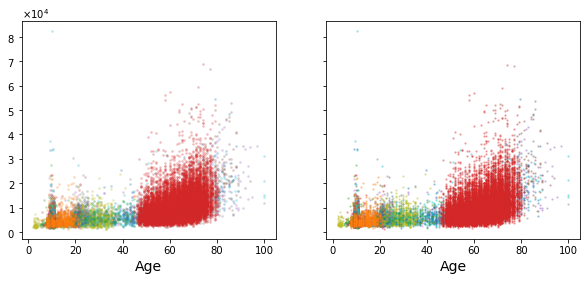

In [75]:
plot_MAP_quantiles(l='SHASHb_2', feature='Right-Lateral-Ventricle')


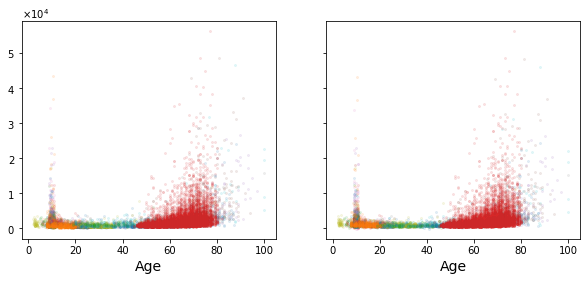

In [68]:

plot_MAP_quantiles(l='SHASHb_2', feature='WM-hypointensities')

Right-Cerebellum-White-Matter


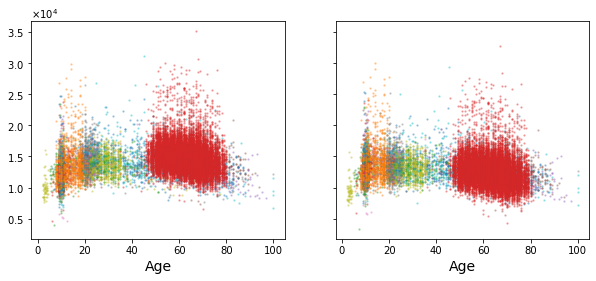

EstimatedTotalIntraCranialVol


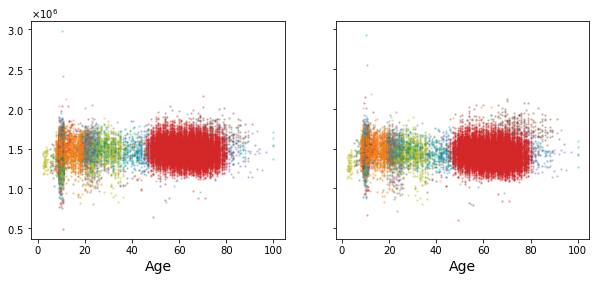

Right-Lateral-Ventricle


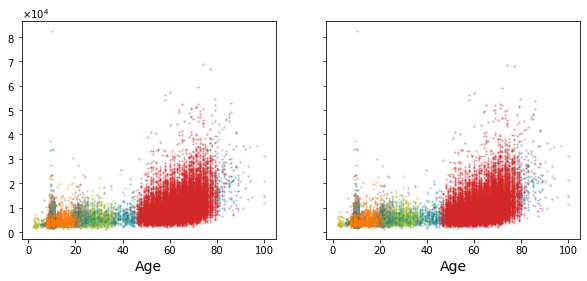

WM-hypointensities


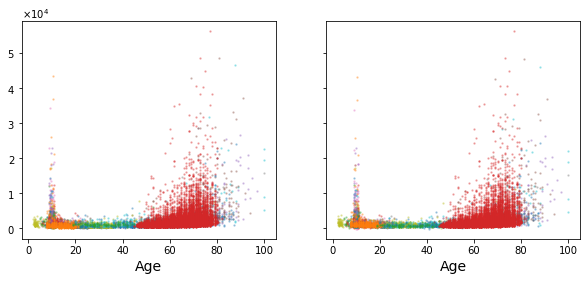

rh_S_interm_prim-Jensen_thickness


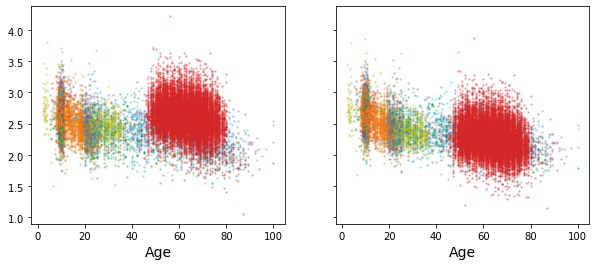

Brain-Stem


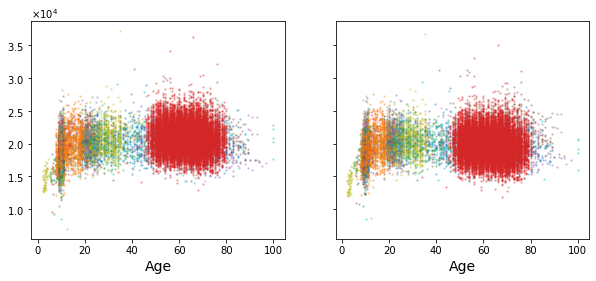

In [77]:
for i_f, f in enumerate(features):
    print(f)
    plot_MAP_quantiles(l='SHASHb_2', feature=f)

In [ ]:
plot_MAP_quantiles(postfix2='True', selected_sex = 'male')
plot_MAP_quantiles(postfix2='True', selected_sex = 'female')

(200, 1)
(1,)
(200,)
(200, 14)
(200, 1)
(1,)
(200,)
(200, 14)
(200, 1)
(1,)
(200,)
(200, 14)
(200, 1)
(1,)
(200,)
(200, 14)


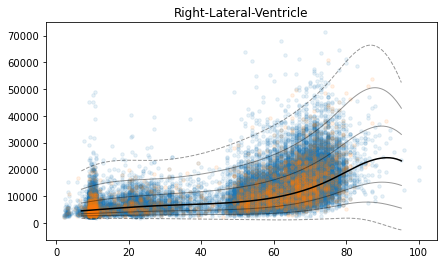

In [11]:
plot_MAP_quantiles(l = 'SHASHb',feature=  'Right-Lateral-Ventricle')

In [10]:
dim1 = 10

all_bes = np.unique(np.random.randint(0,dim1,size=(10,2)), axis = 0)

az = np.random.randn(dim1, dim1)
for be in all_bes:
    print(be)
    
    bet = tuple(be)
    print(az[bet])

[0 0]
0.8975569670019615
[0 5]
-0.7372921940388589
[2 6]
0.2926387619774334
[3 0]
0.5139866033288966
[3 2]
0.3198717260198283
[5 0]
0.010077214480161646
[5 4]
-1.8668029316129853
[8 4]
-0.4144231171312049
[8 5]
1.1591333558913104
[9 2]
-0.034921078527202644
